# Using Neural Networks for Image Recognition

For this portfolio, we will make use of the Logo Images Dataset obtained from https://github.com/msn199959/Logo-2k-plus-Dataset, it contains over 150, 000 images, which are categorised as follows:


| Root Category | Logos | Images |
| --- | --- | --- |
| Food |	769 | 54,507 |
| Clothes |	286 | 20,413 |
| Institution |	238	| 17,103 |
| Accessories |	210 | 14,569 |
| Transportation |	203 | 14,719 |
| Electronic |	191	| 13,972 |
| Necessities |	182 | 13,205 |
| Cosmetic | 115 | 7,929 |
| Leisure |	99 | 7,338 |
| Medical |	48 | 3,385 |
| Total |	2,341 |	167,140 |

## Introduction

A neural network attempts to replicate the structure of the brain, in which neurons pass electrical current form a directed network. Here if enough neurons sense an the input (for example a touch on the skin), a signal is sent via a charge through the network to produce an output.

An artificial neural network imitates this by having an input layer, hidden layers and an output layer as shown below:

\textbf{REVISIT!!!}

As we can see, the internal neurons can have multiple inputs and outputs. The inputs, $x_1, ... ,x_n$, have weights $w_1, ... , w_n$ and this weighted input is passed to an activation function $\phi()$, to get the output of the neuron as:
$$
y = \phi \left( \sum_i x_i w_i \right)
$$

A simple neural network is made up of an input layer, hidden layers and an output layers. Our aim is to select correct weights on each edge using iterative methods.

## Backpropogation

This is a training method, also referred to "the backward propogation of errors". To use this, we first define the following quatities

\begin{align}
    J(y) &= (t-y)^2 \text{ the loss function,} \\
    D_n(y) &= \frac{d J(y)}{dw_n} \text{ the derivative of the loss function }
\end{align}

We then perform the following steps for each $(x,t) \in X$
1. Pass $x$ through the neural network and obtain the output $y$
2. Obtain the new weight for each edge $w_n' = \delta w_n = -RD_n(y)$ for a learning rate $R$

## The Pet Breed Dataset


In [3]:
import pathlib

data_dir = pathlib.Path("Pet_Breeds")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3366


In [4]:
import warnings
warnings.filterwarnings('ignore')

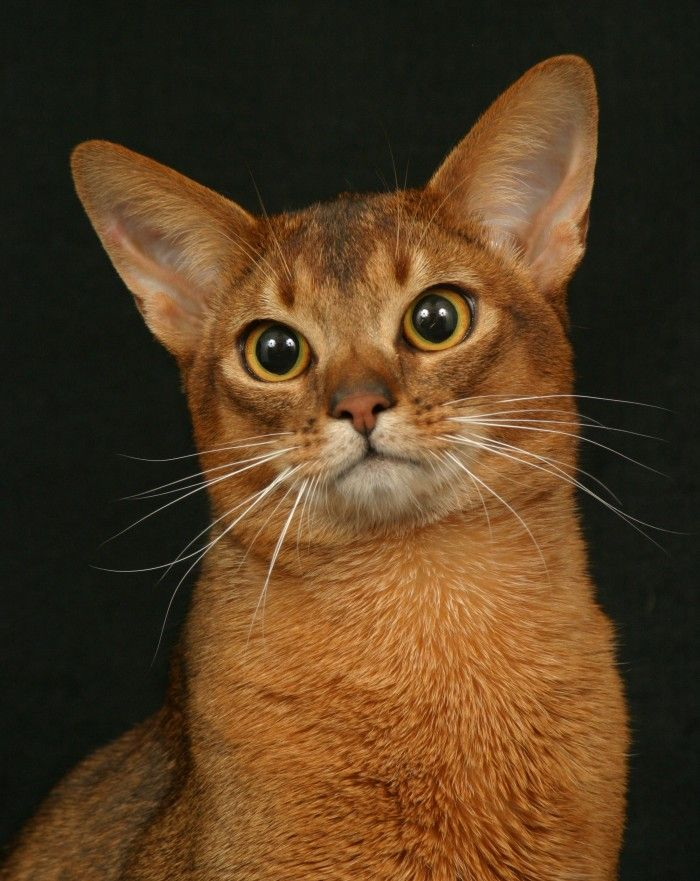

In [5]:
import PIL
import PIL.Image

abyssinian = list(data_dir.glob('abyssinian/*'))
PIL.Image.open(str(abyssinian[50]))

In [6]:
TF_ENABLE_ONEDNN_OPTS=0
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

batch_size = 32
img_height = 180
img_width = 180


2023-06-05 11:13:39.829830: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-05 11:13:39.855575: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 11:13:40.033605: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 11:13:40.034501: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 11:13:40.797874: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [7]:


train_dataset, test_dataset = tf.keras.utils.image_dataset_from_directory(
      data_dir,
      validation_split=0.2,
      subset="both",
      seed=123,
      image_size= (img_height, img_width),
      batch_size= batch_size
  )

Found 3535 files belonging to 23 classes.
Using 2828 files for training.
Using 707 files for validation.


2023-06-05 11:13:46.060029: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-05 11:13:46.060073: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: IT085374
2023-06-05 11:13:46.060077: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: IT085374
2023-06-05 11:13:46.060154: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 525.105.17
2023-06-05 11:13:46.060177: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  525.105.17  Release Build  (dvs-builder@U16-T02-30-1)  Tue Mar 28 22:29:15 UTC 2023
GCC version:  gcc version 9.4.0 (Ubuntu 9.4.0-1ubuntu

In [8]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [9]:
class_names = train_dataset.class_names
print(class_names)

['abyssinian', 'american shorthair', 'beagle', 'boxer', 'bulldog', 'chihuahua', 'corgi', 'dachshund', 'german shepherd', 'golden retriever', 'husky', 'labrador', 'maine coon', 'mumbai cat', 'persian cat', 'pomeranian', 'pug', 'ragdoll cat', 'rottwiler', 'shiba inu', 'siamese cat', 'sphynx', 'yorkshire terrier']


2023-06-05 11:13:46.527608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2828]
	 [[{{node Placeholder/_4}}]]
2023-06-05 11:13:46.527792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2828]
	 [[{{node Placeholder/_4}}]]


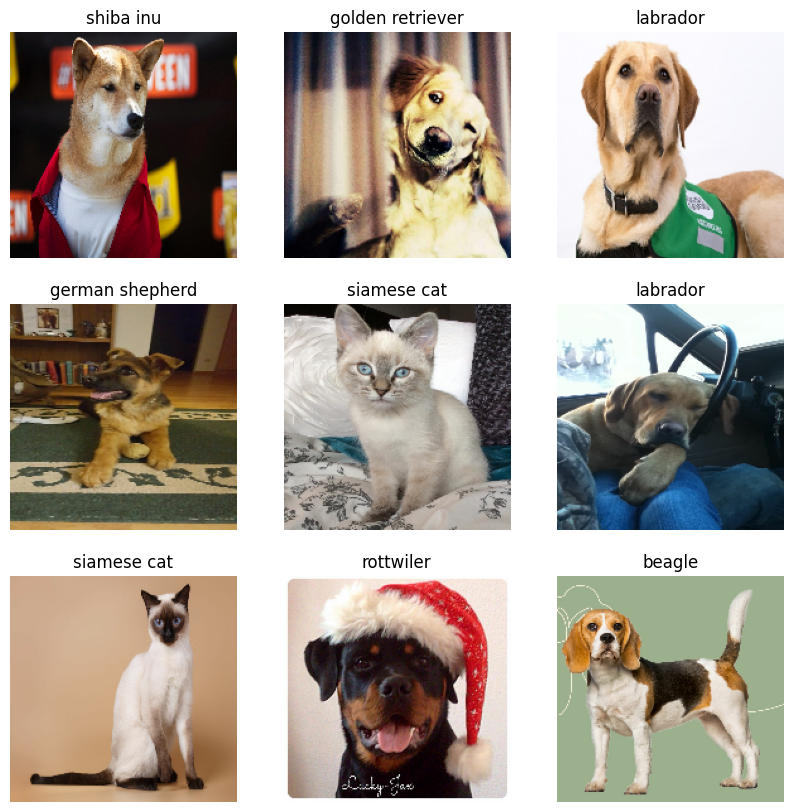

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Data Processing

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)


In [12]:
normalization_layer = layers.Rescaling(1./255)

# Building the network
We start with the netowkr below which has 9 layers:

In [13]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

We now compile it and evaluate how it performs on our testing and training data:

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

Epoch 1/10


2023-06-05 11:13:48.696958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2828]
	 [[{{node Placeholder/_4}}]]
2023-06-05 11:13:48.697218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2828]
	 [[{{node Placeholder/_4}}]]


89/89 [==============================] - ETA: 0s - loss: 3.1069 - accuracy: 0.0615

2023-06-05 11:14:06.769493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [707]
	 [[{{node Placeholder/_4}}]]
2023-06-05 11:14:06.769671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [707]
	 [[{{node Placeholder/_4}}]]


89/89 [==============================] - 21s 143ms/step - loss: 3.1069 - accuracy: 0.0615 - val_loss: 3.0835 - val_accuracy: 0.1174
Epoch 2/10
89/89 [==============================] - 11s 120ms/step - loss: 2.9145 - accuracy: 0.1252 - val_loss: 2.9014 - val_accuracy: 0.1429
Epoch 3/10
89/89 [==============================] - 11s 119ms/step - loss: 2.6755 - accuracy: 0.2008 - val_loss: 2.8420 - val_accuracy: 0.1612
Epoch 4/10
89/89 [==============================] - 11s 129ms/step - loss: 2.2812 - accuracy: 0.3186 - val_loss: 2.9407 - val_accuracy: 0.2122
Epoch 5/10
89/89 [==============================] - 11s 127ms/step - loss: 1.6054 - accuracy: 0.5240 - val_loss: 3.3845 - val_accuracy: 0.2008
Epoch 6/10
89/89 [==============================] - 11s 121ms/step - loss: 0.8552 - accuracy: 0.7542 - val_loss: 4.1034 - val_accuracy: 0.1980
Epoch 7/10
89/89 [==============================] - 11s 123ms/step - loss: 0.3624 - accuracy: 0.9038 - val_loss: 5.3227 - val_accuracy: 0.1867
Epoch 8/10

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

## Evaluating the Performance
We can now plot the loss and accuracy for both datasets to see how our model has performed:

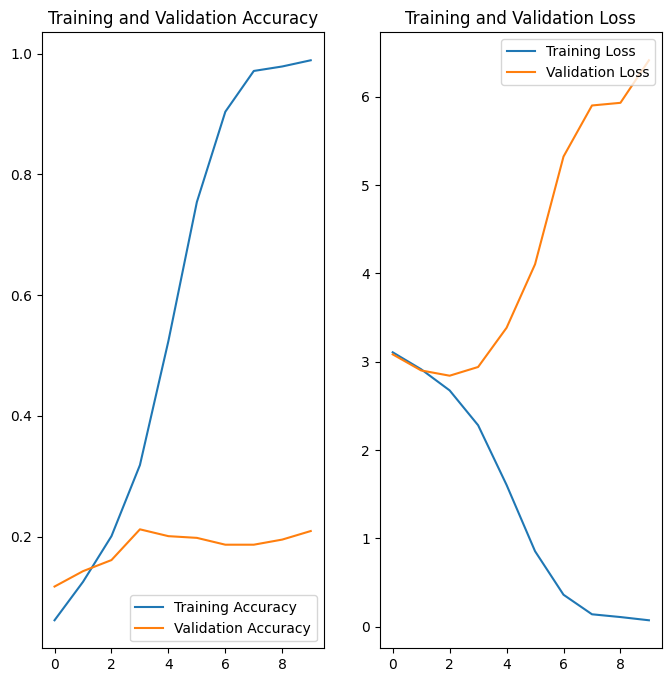

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We can see here the validation accuracy is very low, so we try augmenting the data and adding more layers.

In [20]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

We can now visualise the same image after being augmented several times:

2023-06-05 11:17:41.175775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2828]
	 [[{{node Placeholder/_0}}]]
2023-06-05 11:17:41.176044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2828]
	 [[{{node Placeholder/_4}}]]


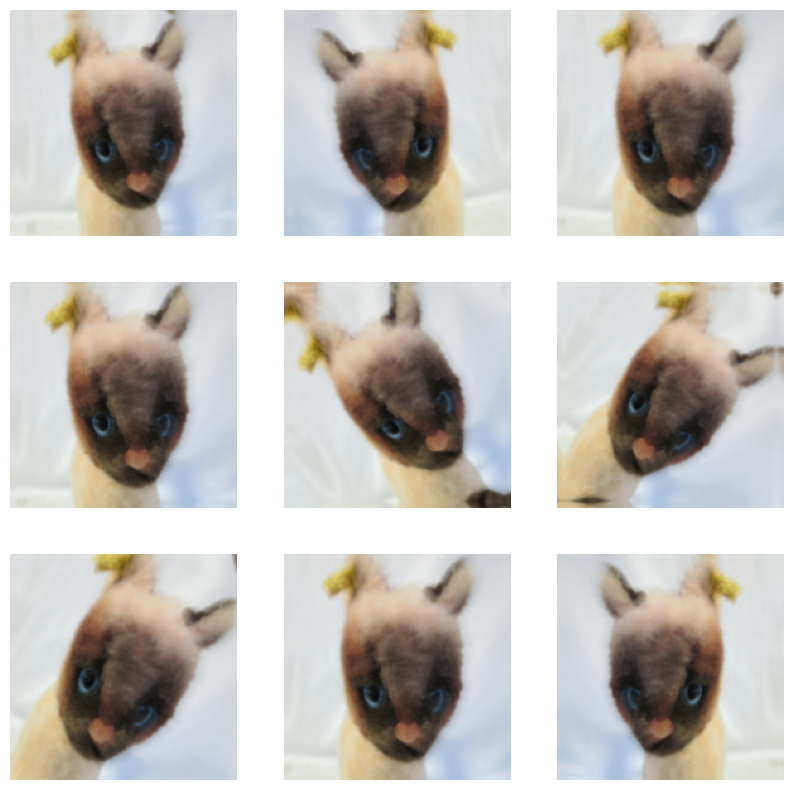

In [22]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

We now also add a drop-out layer to the neural network:

In [23]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

and compile and train the model as before:

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fbf097e84c0>>

In [26]:
epochs = 15
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

Epoch 1/15
89/89 [==============================] - 13s 142ms/step - loss: 3.1182 - accuracy: 0.0580 - val_loss: 2.9826 - val_accuracy: 0.1273
Epoch 2/15
89/89 [==============================] - 13s 141ms/step - loss: 2.8655 - accuracy: 0.1347 - val_loss: 2.8379 - val_accuracy: 0.1542
Epoch 3/15
89/89 [==============================] - 13s 145ms/step - loss: 2.7341 - accuracy: 0.1835 - val_loss: 2.7723 - val_accuracy: 0.1881
Epoch 4/15
89/89 [==============================] - 12s 140ms/step - loss: 2.6563 - accuracy: 0.2016 - val_loss: 2.6902 - val_accuracy: 0.1924
Epoch 5/15
89/89 [==============================] - 12s 136ms/step - loss: 2.5798 - accuracy: 0.2228 - val_loss: 2.6955 - val_accuracy: 0.2122
Epoch 6/15
89/89 [==============================] - 12s 137ms/step - loss: 2.5062 - accuracy: 0.2436 - val_loss: 2.6067 - val_accuracy: 0.2348
Epoch 7/15
89/89 [==============================] - 12s 138ms/step - loss: 2.4359 - accuracy: 0.2765 - val_loss: 2.5593 - val_accuracy: 0.2617

Again we can visualise the loss and accuracy to evaluate the model

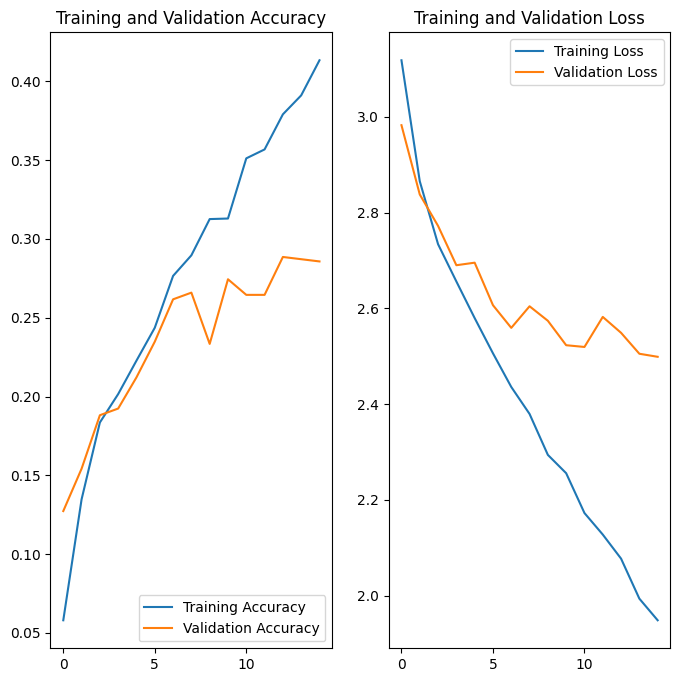

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We can now see there is much less of a discrepency in the training and validation curves suggesting that the problem of overfitting present before has been somewhat reduced.